# Wrangle and Analyze WeRateDogs Twitter Data

In [232]:
import json
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tweepy
import requests
import wget

## 1 - API (read data from Tweeter to download ID'd favorite and retweet count data)

In [233]:
# establish connection with Tweeter API server

consumer_key    = 'x'
consumer_secret = 'x'
access_token    = 'x'
access_secret   = 'x'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [ ]:
# save tweets into a TXT file with JSON rows

# get tweets to be downloaded from this CSV
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

tweets_unavailable = []

# will download tweets from list on a JSON dictionary and write them line by line on TXT file
with open(os.path.join(os.getcwd(), 'tweet_json.txt'), mode = 'w') as file:
    for tweet_id in df_twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            file.write(json.dumps(tweet._json) + '\n')
            print(str(tweet_id))
        except:
            tweets_unavailable.append(tweet_id)
            print("ERROR in Tweet: " + str(tweet_id))

In [234]:
# read TXT file

twt_id, favs, rtwts = [], [], []
# text file contains multiple lines, each being a JSON dictionary
with open('tweet_json.txt', mode = 'r') as f:
     for line in f.readlines():
            tweet_data = json.loads(line)
            twt_id.append(tweet_data['id'])
            favs.append(tweet_data['favorite_count'])
            rtwts.append(tweet_data['retweet_count'])
            
df_tweet_json = pd.DataFrame({'tweet_id':twt_id, 'fav_count':favs, 'rtwt_count':rtwts})
    
df_tweet_json.sample(3)

,tweet_id,fav_count,rtwt_count
1327,704054845121142784,2831,885
89,874680097055178752,25571,4104
1036,741438259667034112,3586,787


## 2 - CSV (UDACITY provided file that has Tweet: ID, text, rating N/D, dog categories)

In [235]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

df_twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
234,847617282490613760,8.476062e+17,4.196984e+09,2017-03-31 01:11:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@breaannanicolee PUPDATE: Cannon has a heart ...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1248,711363825979756544,NaN,NaN,2016-03-20 01:28:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Please, no puparazzi"" 11/10 https://t.co/nJIX...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/711363825...,11,10,None,None,None,None,None
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,None,None,None,None


## 3 - TSV (UDACITY provided text file with tweet ID, image info, NN predictions of dog breed)

In [236]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = 'image-predictions.tsv'
folder_name = 'image-predictions'
# Make directory if it doesn't already exist

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
wget.download(url, os.path.join(folder_name, file_name))

os.listdir(folder_name)

df_image_predictions = pd.read_csv(os.path.join(folder_name, file_name), sep='\t')

df_image_predictions.sample(3)

100% [........................................................] 335079 / 335079

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1744,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
1766,826848821049180160,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,0.017104,True
169,668989615043424256,https://pbs.twimg.com/media/CUi6geuUYAIvE9n.jpg,1,pug,0.917326,True,waffle_iron,0.014918,False,Chihuahua,0.013524,True


## ASSESSMENT

In [237]:
# df_twitter_archive has: Tweet: ID, text, rating N/D, dog categories
# df_image_predictions has: tweet ID, image link, NN predictions of dog breed
# df_tweet_json has: Tweet ID, retweet count, favorite count
    
df_twitter_archive.info()
df_image_predictions.info()
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [238]:
df_twitter_archive.describe()
df_image_predictions.describe()
df_tweet_json.describe()

,tweet_id,fav_count,rtwt_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7360.003861,2609.771343
std,6.823170e+16,11430.060650,4415.613944
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1279.000000,528.500000
50%,7.182469e+17,3195.000000,1219.000000
75%,7.986692e+17,9008.000000,3029.000000
max,8.924206e+17,151721.000000,74997.000000


In [239]:
df_twitter_archive[df_twitter_archive['tweet_id'].duplicated()]
df_image_predictions[df_image_predictions['tweet_id'].duplicated()]
df_tweet_json[df_tweet_json['tweet_id'].duplicated()]

df_all = pd.Series(list(df_twitter_archive) + list(df_image_predictions) + list(df_tweet_json))
df_all[df_all.duplicated()]

df_twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Jiminus       1
Einstein      1
Julio         1
Huck          1
Jarvis        1
Name: name, Length: 957, dtype: int64

## ISSUES

### Tidiness

df_tweet_json 
* there needs to be a table for retweets and favs

df_twitter_archive 
* needs to have multiple columns for dog stages

### Quality

df_tweet_json
* floats incorrectly used for rtwts and favs
* is missing retweets and favorite data for some tweets

df_twitter_archive
* floats incorrectly used for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id
* int incorrectly used for tweet_id
* str incorrectly used for retweeted_status_timestamp
* str incorrectly used for dog stages 
* incorrect dog names (ex. a, an, the, just ....)
* df_twitter_archive rating numerator and denominator are not consistent
* not all tweets have an image link
* we only want tweets with original data and ranking, retweets that have images should be removed, they will skew the analysis

df_image_predictions
* accuracy for NN predictions may not be accurate, but will not be part of the cleaning scope
* is missing predictions for some tweets


## TIDINESS

In [240]:
# Define: df_tweet_json: favorite and retweet counts in own table
# Code: tweet_id should be string, then join all 3 DFs by tweet_id
df_twitter_archive_cln   = df_twitter_archive.copy()
df_image_predictions_cln = df_image_predictions.copy()
df_tweet_json_cln        = df_tweet_json.copy()

df_twitter_archive_cln['tweet_id']   = df_twitter_archive_cln['tweet_id'].astype(str)
df_image_predictions_cln['tweet_id'] = df_image_predictions_cln['tweet_id'].astype(str)
df_tweet_json_cln['tweet_id']        = df_tweet_json_cln['tweet_id'].astype(str)

df_cln = pd.merge(df_twitter_archive_cln, df_tweet_json_cln, how='inner', on='tweet_id')
df_cln = pd.merge(df_cln, df_image_predictions_cln, how='inner', on='tweet_id')

In [241]:
# Test
df_cln.info()

df_cln.sample(3)

df_cln[df_cln['rtwt_count'].isnull()] # check for NANs

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [242]:
# Define: there are multiple dog stage columns, need a single one
# Code: melt 4 cols into 1
cols_names = list(df_cln.columns)
if 'doggo'   in cols_names: cols_names.remove('doggo')
if 'floofer' in cols_names: cols_names.remove('floofer')
if 'pupper'  in cols_names: cols_names.remove('pupper')
if 'puppo'   in cols_names: cols_names.remove('puppo')

df_cln = pd.melt(df_cln, id_vars=cols_names, value_name='dog_stage')
df_cln = df_cln.drop('variable', axis=1)

In [243]:
# Test
df_cln.info()

df_cln['dog_stage'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    8236 non-null   object 
 1   in_reply_to_status_id       92 non-null     float64
 2   in_reply_to_user_id         92 non-null     float64
 3   timestamp                   8236 non-null   object 
 4   source                      8236 non-null   object 
 5   text                        8236 non-null   object 
 6   retweeted_status_id         288 non-null    float64
 7   retweeted_status_user_id    288 non-null    float64
 8   retweeted_status_timestamp  288 non-null    object 
 9   expanded_urls               8236 non-null   object 
 10  rating_numerator            8236 non-null   int64  
 11  rating_denominator          8236 non-null   int64  
 12  name                        8236 non-null   object 
 13  fav_count                   8236 

None       7905
pupper      221
doggo        78
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [244]:
# Define: melted DF has duplicated 'tweet_id' rows with 'dog_stage' None
# Code: remove duplicates

# drops the duplicate rows where 'dog_stage'=='None'
df_cln2 = df_cln.drop_duplicates()
# gives TRUE if row is duplicated
df_cln2_dup_id = df_cln2.duplicated(subset='tweet_id', keep=False)
# gives TRUE if 'dog_stage' is None
df_cln2_non_id = (df_cln2['dog_stage']=='None')
# rows to be dropped
df_cln2_drp_id = df_cln2_dup_id & df_cln2_non_id
# add drop:True/False column
df_cln3 = pd.concat([df_cln2, df_cln2_drp_id.rename('drop')], axis=1)
# keep non-duplicated rows
df_cln4 = df_cln3[df_cln3['drop'] == False]
df_cln4.drop('drop', axis=1, inplace=True)

C:\Anaconda3\envs\py38\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [245]:
# test
df_cln4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7053
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2072 non-null   object 
 1   in_reply_to_status_id       24 non-null     float64
 2   in_reply_to_user_id         24 non-null     float64
 3   timestamp                   2072 non-null   object 
 4   source                      2072 non-null   object 
 5   text                        2072 non-null   object 
 6   retweeted_status_id         74 non-null     float64
 7   retweeted_status_user_id    74 non-null     float64
 8   retweeted_status_timestamp  74 non-null     object 
 9   expanded_urls               2072 non-null   object 
 10  rating_numerator            2072 non-null   int64  
 11  rating_denominator          2072 non-null   int64  
 12  name                        2072 non-null   object 
 13  fav_count                   2072 

## QUALITY

In [246]:
df_val = df_cln4.copy()

In [247]:
# Define: some columns are float and should be strings
# Code: convert type
list_vars = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
for var in list_vars:
    df_val[var] = df_val[var].astype(str)

In [248]:
# Test
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7053
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2072 non-null   object 
 1   in_reply_to_status_id       2072 non-null   object 
 2   in_reply_to_user_id         2072 non-null   object 
 3   timestamp                   2072 non-null   object 
 4   source                      2072 non-null   object 
 5   text                        2072 non-null   object 
 6   retweeted_status_id         2072 non-null   object 
 7   retweeted_status_user_id    2072 non-null   object 
 8   retweeted_status_timestamp  74 non-null     object 
 9   expanded_urls               2072 non-null   object 
 10  rating_numerator            2072 non-null   int64  
 11  rating_denominator          2072 non-null   int64  
 12  name                        2072 non-null   object 
 13  fav_count                   2072 

In [249]:
# Define: some time columns don't have the correct type
# Code: convert to datetime dtype
df_val['timestamp'] = pd.to_datetime(df_val['timestamp'])
df_val['retweeted_status_timestamp'] = pd.to_datetime(df_val['retweeted_status_timestamp'])

In [250]:
# Test
df_val.info()

df_val['timestamp'].sample(3)

df_val['retweeted_status_timestamp'].sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7053
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2072 non-null   object             
 1   in_reply_to_status_id       2072 non-null   object             
 2   in_reply_to_user_id         2072 non-null   object             
 3   timestamp                   2072 non-null   datetime64[ns, UTC]
 4   source                      2072 non-null   object             
 5   text                        2072 non-null   object             
 6   retweeted_status_id         2072 non-null   object             
 7   retweeted_status_user_id    2072 non-null   object             
 8   retweeted_status_timestamp  74 non-null     datetime64[ns, UTC]
 9   expanded_urls               2072 non-null   object             
 10  rating_numerator            2072 non-null   int64           

1871   NaT
1807   NaT
485    NaT
Name: retweeted_status_timestamp, dtype: datetime64[ns, UTC]

In [251]:
# Define: dog_stage categories are strings
# Code: convert to categorical dtype
df_val['dog_stage'] = df_val['dog_stage'].astype('category')

In [252]:
# Test
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7053
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2072 non-null   object             
 1   in_reply_to_status_id       2072 non-null   object             
 2   in_reply_to_user_id         2072 non-null   object             
 3   timestamp                   2072 non-null   datetime64[ns, UTC]
 4   source                      2072 non-null   object             
 5   text                        2072 non-null   object             
 6   retweeted_status_id         2072 non-null   object             
 7   retweeted_status_user_id    2072 non-null   object             
 8   retweeted_status_timestamp  74 non-null     datetime64[ns, UTC]
 9   expanded_urls               2072 non-null   object             
 10  rating_numerator            2072 non-null   int64           

In [253]:
# Define: fav_count and rtwt_count are floats
# Code: convert to integer
df_val['fav_count']  = df_val['fav_count'].astype('int64')
df_val['rtwt_count'] = df_val['rtwt_count'].astype('int64')

In [254]:
# Test
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7053
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2072 non-null   object             
 1   in_reply_to_status_id       2072 non-null   object             
 2   in_reply_to_user_id         2072 non-null   object             
 3   timestamp                   2072 non-null   datetime64[ns, UTC]
 4   source                      2072 non-null   object             
 5   text                        2072 non-null   object             
 6   retweeted_status_id         2072 non-null   object             
 7   retweeted_status_user_id    2072 non-null   object             
 8   retweeted_status_timestamp  74 non-null     datetime64[ns, UTC]
 9   expanded_urls               2072 non-null   object             
 10  rating_numerator            2072 non-null   int64           

In [255]:
# Define: fav_count and rtwt_count NANs 
# Code: convert to median
fav_count_median  = np.median(df_val['fav_count'].dropna())
rtwt_count_median = np.median(df_val['rtwt_count'].dropna())

df_val['fav_count']  = df_val['fav_count'].fillna(fav_count_median)
df_val['rtwt_count'] = df_val['rtwt_count'].fillna(rtwt_count_median)

In [256]:
# Test
print('median values for fav and retweet counts were:', fav_count_median, rtwt_count_median)
df_val.info()

median values for fav and retweet counts were: 3446.0 1190.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 7053
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2072 non-null   object             
 1   in_reply_to_status_id       2072 non-null   object             
 2   in_reply_to_user_id         2072 non-null   object             
 3   timestamp                   2072 non-null   datetime64[ns, UTC]
 4   source                      2072 non-null   object             
 5   text                        2072 non-null   object             
 6   retweeted_status_id         2072 non-null   object             
 7   retweeted_status_user_id    2072 non-null   object             
 8   retweeted_status_timestamp  74 non-null     datetime64[ns, UTC]
 9   expanded_urls               2072 non-null   object             
 10 

In [257]:
# Define: names seem incorrect
# Code: convert names to 'None'

bad_names = [
'a',
'actually',
'all',
'an',
'by',
'getting',
'his',
'incredibly',
'infuriating',
'just',
'light',
'my',
'not',
'officially',
'one',
'quite',
'space',
'such',
'the',
'this',
'unacceptable',
'very']

df_val['name'] = df_val['name'].replace(to_replace=bad_names, value='None')

In [258]:
# Test
df_val['name'].value_counts()

None       682
Cooper      10
Penny       10
Oliver      10
Tucker      10
          ... 
Joshwa       1
Quinn        1
Duchess      1
Cannon       1
Deacon       1
Name: name, Length: 912, dtype: int64

In [259]:
# Define: rating_numerator and rating_denominator are inconsistent
# Code: recompute rating based on N/D then cap at 99percentile value

df_val['rating_fix'] = 0.0
# calculate ratio for rating
df_val['rating_fix1'] = df_val['rating_numerator'] / df_val['rating_denominator'] * 10.0
# compute 99% for the distribution 
rating_99p = df_val['rating_fix1'].quantile(0.99)
print('99percentile of the N/D rating distribution is =', rating_99p)
print('# of ratings above 99percentile is =', df_val['rating_fix1'][df_val['rating_fix1'] > rating_99p].count() )
# cap rating at 10.0
df_val['rating_fix2'] = df_val['rating_fix1'] * rating_99p / 10.0
df_val['rating_fix2'][df_val['rating_fix2'] > 10.0] = 10.0

99percentile of the N/D rating distribution is = 14.0
# of ratings above 99percentile is = 7


<ipython-input-259-71d39625f6e4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['rating_fix2'][df_val['rating_fix2'] > 10.0] = 10.0


In [260]:
# Test
df_val['rating_fix2'].describe()

count    2072.000000
mean        9.771674
std         1.041146
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: rating_fix2, dtype: float64

In [261]:
# Define: remove retweet cols AFTER having removed rows that contain retweets
# Code: use pandas functions to keep some rows and drop cols

#  remove all rows that have values (not blank or non-null) in retweet cols
df_val = df_val[df_val['retweeted_status_id']=='nan']

# remove retweet cols after rows are empty
df_val.drop('retweeted_status_id', axis=1, inplace=True)
df_val.drop('retweeted_status_user_id', axis=1, inplace=True)
df_val.drop('retweeted_status_timestamp', axis=1, inplace=True)

## STORE

In [262]:
# saving to CSV file
df_val.to_csv('wrangle_act_14.csv', encoding='utf-8', index=False)

## VISUALIZATIONS and ANALYSIS

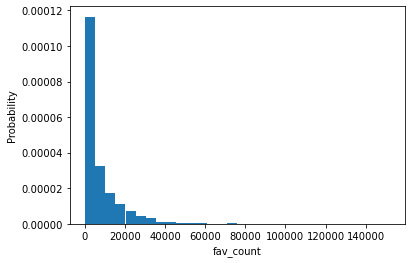

In [263]:
fig, ax = plt.subplots(1, 1)
ax.hist(df_val['fav_count'], density=True, bins=30)
ax.set_ylabel('Probability')
ax.set_xlabel('fav_count')
plt.show()

#### Shown above is the probability histogram for favortie count, meaning that most tweets only get less than 10000 favorites

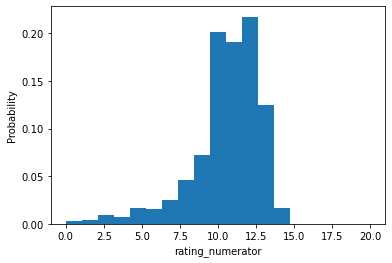

In [264]:
fig, ax = plt.subplots(1, 1)
ax.hist(df_val['rating_numerator'], density=True, bins=np.linspace(0.0,20.0,20))
ax.set_ylabel('Probability')
ax.set_xlabel('rating_numerator')
plt.show()

#### Shown above is the distribution for dog ratings. It should top out at 10, but the users push it pass forward.

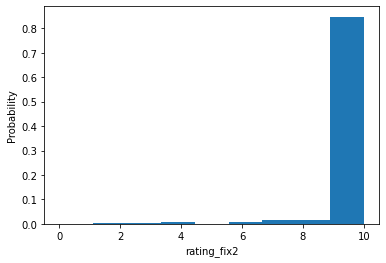

In [265]:
fig, ax = plt.subplots(1, 1)
ax.hist(df_val['rating_fix2'], density=True, bins=np.linspace(0.0,10.0,10))
ax.set_ylabel('Probability')
ax.set_xlabel('rating_fix2')
plt.show()

#### Shown above is the "fix" rating system, did not work very well since it skewed everything towards 10

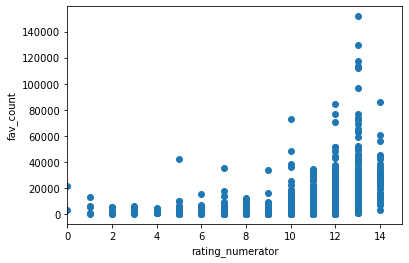

In [266]:
fig, ax = plt.subplots(1, 1)
ax.scatter(df_val['rating_numerator'], df_val['fav_count'])
ax.set_ylabel('fav_count')
ax.set_xlabel('rating_numerator')
ax.set_xlim(0, 15)
plt.show()

#### There seems to be a relationship between favs and rating, the higher the rating , the more fav counts, up to a limit of 13

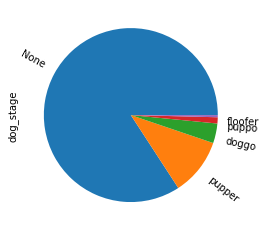

In [267]:
df_val['dog_stage'].value_counts().plot(kind='pie', rotatelabels = True)
plt.show()

#### Dog stage shown above, None specified is the most common, and 2nd is pupper

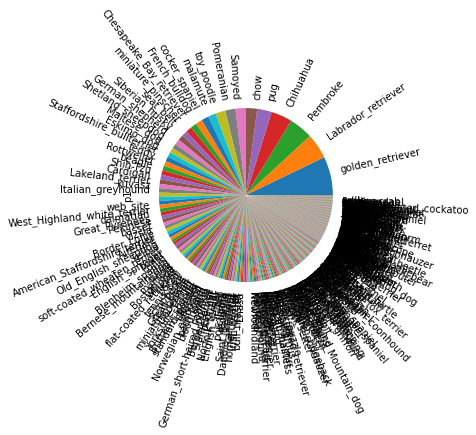

In [268]:
df_val['p1'].value_counts().plot(kind='pie', rotatelabels = True)
plt.show()

#### Dog breed prediction shown above, seems that golden retriever is the most common

In [269]:
n_samples = 5

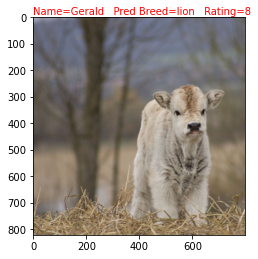

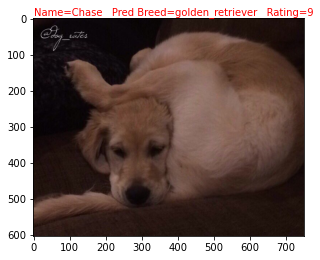

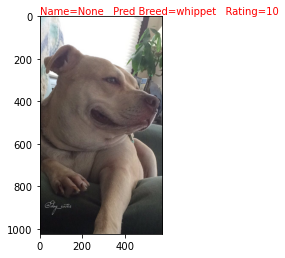

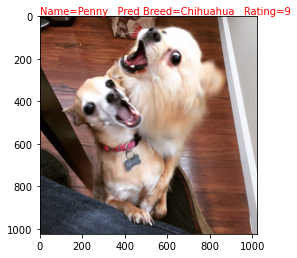

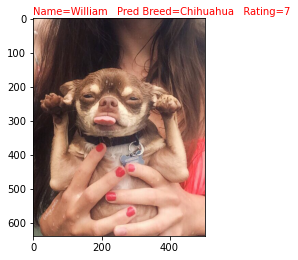

In [270]:
# Random Tweet Dog Pictures with predicted breed and user rating
df_val_sample = df_val.sample(n=n_samples)
for i in range(n_samples):    
    f = open('tmp.jpg','wb')
    image1_fname = df_val_sample['jpg_url'].iloc[i]
    f.write(requests.get(image1_fname).content)
    f.close()
    image1 = mpimg.imread('tmp.jpg')
    plt.imshow(image1)
    image1_str = 'Name=' + df_val_sample['name'].iloc[i]
    image1_str = image1_str + '   Pred Breed=' + df_val_sample['p1'].iloc[i]
    image1_str = image1_str + '   Rating=' + str(df_val_sample['rating_numerator'].iloc[i])
    plt.text(0,-10, image1_str, color='red')
    plt.show()

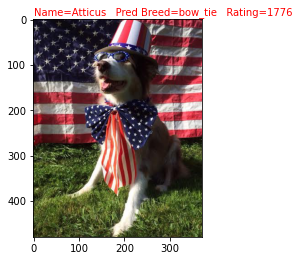

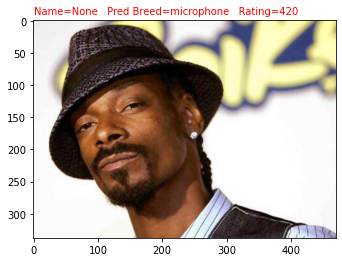

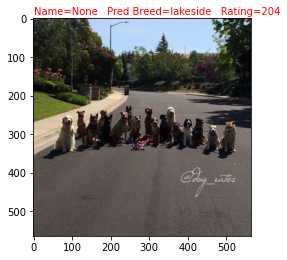

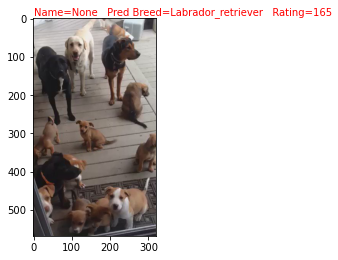

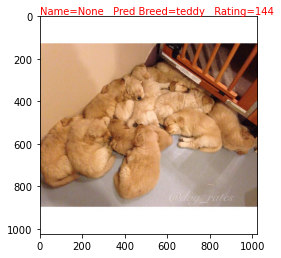

In [271]:
# Highest Ratings - Tweet Dog Pictures with predicted breed and user rating
df_val_sample = df_val.nlargest(n_samples, columns=['rating_numerator'])
for i in range(n_samples):    
    f = open('tmp.jpg','wb')
    image1_fname = df_val_sample['jpg_url'].iloc[i]
    f.write(requests.get(image1_fname).content)
    f.close()
    image1 = mpimg.imread('tmp.jpg')
    plt.imshow(image1)
    image1_str = 'Name=' + df_val_sample['name'].iloc[i]
    image1_str = image1_str + '   Pred Breed=' + df_val_sample['p1'].iloc[i]
    image1_str = image1_str + '   Rating=' + str(df_val_sample['rating_numerator'].iloc[i])
    plt.text(0,-10, image1_str, color='red')
    plt.show()

#### Most popular tweeted dogs were the patriotic dog and snoop dog!!!

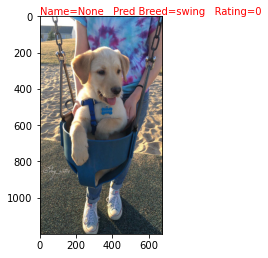

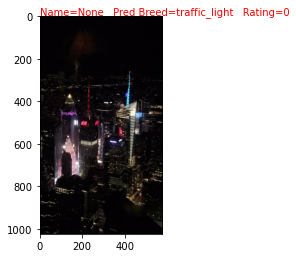

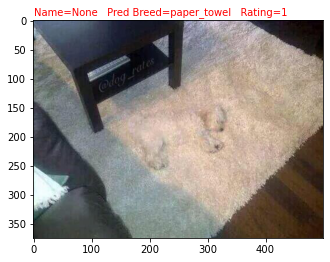

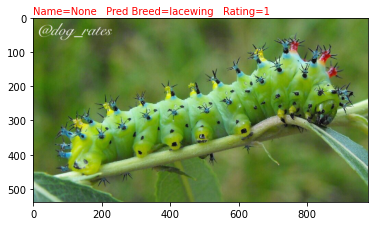

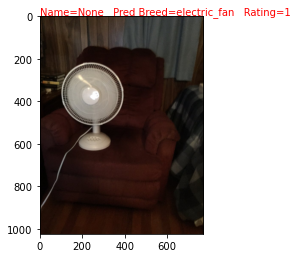

In [272]:
# Lowest Ratings - Tweet Dog Pictures with predicted breed and user rating
df_val_sample = df_val.nsmallest(n_samples, columns=['rating_numerator'])
for i in range(n_samples):    
    f = open('tmp.jpg','wb')
    image1_fname = df_val_sample['jpg_url'].iloc[i]
    f.write(requests.get(image1_fname).content)
    f.close()
    image1 = mpimg.imread('tmp.jpg')
    plt.imshow(image1)
    image1_str = 'Name=' + df_val_sample['name'].iloc[i]
    image1_str = image1_str + '   Pred Breed=' + df_val_sample['p1'].iloc[i]
    image1_str = image1_str + '   Rating=' + str(df_val_sample['rating_numerator'].iloc[i])
    plt.text(0,-10, image1_str, color='red')
    plt.show()

#### Some of the least popular tweeted dogs were not actually dogs